In [135]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors
import plotly.express as px

In [136]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [137]:
supp_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"].isna())]
supp_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
28573,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,0.000000,329.0,650.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28574,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,1.000417,11472.0,6090.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28576,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,2.000717,11248.0,926.0,1.0,1.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28577,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,3.000917,7331.0,1287.0,1.0,1.0,...,70.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28579,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,4.000933,6115.0,1075.0,3.0,2.0,...,70.0,18.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283755,KR_6375939420,Red,anonymous 126,kr,Annie,15.004967,7055.0,6283.0,8.0,5.0,...,56.0,214.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283758,KR_6375939420,Red,anonymous 126,kr,Annie,16.005283,10074.0,6771.0,8.0,6.0,...,56.0,214.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283763,KR_6375939420,Red,anonymous 126,kr,Annie,17.005467,5904.0,5224.0,8.0,6.0,...,56.0,214.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283765,KR_6375939420,Red,anonymous 126,kr,Annie,18.005850,6273.0,9101.0,9.0,6.0,...,140.0,214.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY


Champions' winrates

In [138]:
profiling_df = supp_deaths_df[(supp_deaths_df["victory"] == True)].copy()

In [139]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])
#champs_df.sort_values(by=["victories"], ascending=False)
#print(champs)
    

In [140]:
profiling_df = supp_deaths_df[(supp_deaths_df["victory"] == False)].copy()

In [141]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df2 = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df2[0])] = champs[str(champs_df2[0])] + 1
    except:
        champs[str(champs_df2[0])] = 1

champs_df2 = pd.DataFrame.from_dict(champs, orient="index", columns=['defeats'])

champs_winrate = [champs_df, champs_df2]
champs_winrate_df = pd.concat(champs_winrate, axis=1)

champsWinrates = []
for row in champs_winrate_df.iterrows():
    champsWinrates_row = {}
    if(np.isnan(row[1][0])):
        row[1][0] = 0
    if(np.isnan(row[1][1])):
        row[1][1] = 0
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["win rate"] = round(row[1][0]/(row[1][0] + row[1][1]), 2)
    champsWinrates_row["matches"] = row[1][0] + row[1][1]

    champsWinrates.append(champsWinrates_row)

champsWinrates_df = pd.DataFrame(champsWinrates).set_index(["champion"])
champsWinrates_df.sort_values(by=["matches", "win rate"], ascending= False)

,win rate,matches
champion,,
Ashe,0.59,134.0
Annie,0.55,91.0
Rakan,0.58,73.0
Nautilus,0.51,61.0
Lux,0.57,58.0
Karma,0.59,56.0
Heimerdinger,0.54,37.0
Pyke,0.56,34.0
Rell,0.77,30.0


In [142]:
print("This dataset contains {} matches in which the supp died at least once".format(len(np.unique(supp_deaths_df["gameId"]))))

This dataset contains 853 matches in which the supp died at least once


In [143]:
print("{} players died a total of {} times".format(len(np.unique(supp_deaths_df["summoner"])), supp_deaths_df.shape[0]))

19 players died a total of 23597 times


In [144]:
print("This Dataset contains an average of {} deaths per game".format((supp_deaths_df.shape[0]/len(np.unique(supp_deaths_df["gameId"])))))

This Dataset contains an average of 27.663540445486518 deaths per game


In [145]:
blueSide_supp_deaths_df = supp_deaths_df[supp_deaths_df["team"] == "Blue"]
blueSide_supp_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
28573,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,0.000000,329.0,650.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28574,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,1.000417,11472.0,6090.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28576,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,2.000717,11248.0,926.0,1.0,1.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28577,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,3.000917,7331.0,1287.0,1.0,1.0,...,70.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28579,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,4.000933,6115.0,1075.0,3.0,2.0,...,70.0,18.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283714,KR_6375965891,Blue,anonymous 126,kr,Karma,13.002833,13065.0,3696.0,7.0,7.0,...,410.0,248.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283717,KR_6375965891,Blue,anonymous 126,kr,Karma,14.002867,11123.0,995.0,7.0,7.0,...,410.0,248.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283718,KR_6375965891,Blue,anonymous 126,kr,Karma,15.003117,1948.0,1131.0,8.0,7.0,...,410.0,573.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283722,KR_6375965891,Blue,anonymous 126,kr,Karma,16.003533,2483.0,4680.0,8.0,7.0,...,410.0,593.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY


In [146]:
gamesBlueSide = len(np.unique(blueSide_supp_deaths_df["gameId"]))
gamesBlueSide

408

In [147]:
players_df = np.unique(blueSide_supp_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_supp_deaths_df[blueSide_supp_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 109 played 18 matches
anonymous 110 played 14 matches
anonymous 111 played 47 matches
anonymous 112 played 45 matches
anonymous 113 played 30 matches
anonymous 115 played 13 matches
anonymous 116 played 17 matches
anonymous 117 played 15 matches
anonymous 118 played 21 matches
anonymous 119 played 14 matches
anonymous 121 played 25 matches
anonymous 122 played 19 matches
anonymous 123 played 20 matches
anonymous 124 played 32 matches
anonymous 125 played 13 matches
anonymous 126 played 31 matches
anonymous 127 played 9 matches
anonymous 128 played 14 matches
anonymous 129 played 11 matches


In [148]:
print("Blue side contains {} matches in which the supp died at least once".format(len(np.unique(blueSide_supp_deaths_df["gameId"]))))

Blue side contains 408 matches in which the supp died at least once


In [149]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_supp_deaths_df["summoner"])), blueSide_supp_deaths_df.shape[0]))

19 players died a total of 11003 times on the blue side


In [150]:
redSide_supp_deaths_df = supp_deaths_df[supp_deaths_df["team"] == "Red"]
redSide_supp_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
28624,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,0.000000,14404.0,14201.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28625,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,1.000450,13283.0,3955.0,1.0,0.0,...,0.0,10.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28627,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,2.000817,12877.0,2053.0,1.0,1.0,...,0.0,10.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28628,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,3.000933,12884.0,2094.0,2.0,3.0,...,0.0,10.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28630,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,4.001050,12928.0,2807.0,3.0,5.0,...,0.0,10.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283755,KR_6375939420,Red,anonymous 126,kr,Annie,15.004967,7055.0,6283.0,8.0,5.0,...,56.0,214.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283758,KR_6375939420,Red,anonymous 126,kr,Annie,16.005283,10074.0,6771.0,8.0,6.0,...,56.0,214.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283763,KR_6375939420,Red,anonymous 126,kr,Annie,17.005467,5904.0,5224.0,8.0,6.0,...,56.0,214.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283765,KR_6375939420,Red,anonymous 126,kr,Annie,18.005850,6273.0,9101.0,9.0,6.0,...,140.0,214.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY


In [151]:
gamesRedSide = len(np.unique(redSide_supp_deaths_df["gameId"]))
gamesRedSide

465

In [152]:
players_df = np.unique(redSide_supp_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_supp_deaths_df[redSide_supp_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 109 played 32 matches
anonymous 110 played 15 matches
anonymous 111 played 44 matches
anonymous 112 played 53 matches
anonymous 113 played 29 matches
anonymous 115 played 8 matches
anonymous 116 played 27 matches
anonymous 117 played 27 matches
anonymous 118 played 31 matches
anonymous 119 played 12 matches
anonymous 121 played 26 matches
anonymous 122 played 27 matches
anonymous 123 played 14 matches
anonymous 124 played 26 matches
anonymous 125 played 25 matches
anonymous 126 played 32 matches
anonymous 127 played 12 matches
anonymous 128 played 13 matches
anonymous 129 played 12 matches


In [153]:
print("Red side contains {} matches in which the supp died at least once".format(len(np.unique(redSide_supp_deaths_df["gameId"]))))

Red side contains 465 matches in which the supp died at least once


In [154]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_supp_deaths_df["summoner"])), redSide_supp_deaths_df.shape[0]))

19 players died a total of 12594 times on the red side


function to visualize the results

In [155]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Top Players' locations in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Top Players' locations in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [156]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [157]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [158]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [159]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [160]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)
    
    #move overall title up
    sea.fig.subplots_adjust(top=0.9)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:")
    plt.show()

---
### Clustering Red Team Victory

In [161]:
redSideVictory_df = supp_deaths_df[(supp_deaths_df["team"] == "Red") & (supp_deaths_df["victory"] == True)]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
28681,EUW1_6273884721,Red,anonymous 109,euw1,Nami,0.000000,14404.0,14201.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28682,EUW1_6273884721,Red,anonymous 109,euw1,Nami,1.000517,9716.0,6368.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28683,EUW1_6273884721,Red,anonymous 109,euw1,Nami,2.000967,12429.0,1623.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28685,EUW1_6273884721,Red,anonymous 109,euw1,Nami,3.001317,11627.0,1547.0,2.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28687,EUW1_6273884721,Red,anonymous 109,euw1,Nami,4.001483,11222.0,9742.0,3.0,0.0,...,0.0,88.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283755,KR_6375939420,Red,anonymous 126,kr,Annie,15.004967,7055.0,6283.0,8.0,5.0,...,56.0,214.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283758,KR_6375939420,Red,anonymous 126,kr,Annie,16.005283,10074.0,6771.0,8.0,6.0,...,56.0,214.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283763,KR_6375939420,Red,anonymous 126,kr,Annie,17.005467,5904.0,5224.0,8.0,6.0,...,56.0,214.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283765,KR_6375939420,Red,anonymous 126,kr,Annie,18.005850,6273.0,9101.0,9.0,6.0,...,140.0,214.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY


In [162]:
profiling_df = supp_deaths_df[(supp_deaths_df["team"] == "Red") & (supp_deaths_df["victory"] == True)].copy()

In [163]:
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

In [164]:
winRateRedSide = (winsRedSide / gamesRedSide) * 100
winRateRedSide

57.41935483870968

In [165]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_supp_deaths_df.shape[0]) * 100
winRateRedSide

57.15420041289503

In [166]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 109 won 18 matches on the red side
anonymous 109 has an average of 28.27777777777778 deaths per game when winning on the red side

anonymous 110 won 9 matches on the red side
anonymous 110 has an average of 28.11111111111111 deaths per game when winning on the red side

anonymous 111 won 22 matches on the red side
anonymous 111 has an average of 28.227272727272727 deaths per game when winning on the red side

anonymous 112 won 31 matches on the red side
anonymous 112 has an average of 28.322580645161292 deaths per game when winning on the red side

anonymous 113 won 16 matches on the red side
anonymous 113 has an average of 25.6875 deaths per game when winning on the red side

anonymous 115 won 7 matches on the red side
anonymous 115 has an average of 25.571428571428573 deaths per game when winning on the red side

anonymous 116 won 14 matches on the red side
anonymous 116 has an average of 25.714285714285715 deaths per game when winning on the red side

anonymous 117 won 20 

In [167]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 267 matches in which the jungler died at least once
19 players died a total of 7198 times on the red side
Victory games on red side contains an average of 26.95880149812734 deaths per game


In [168]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
28681,14404.0,14201.0,0.000000
28682,9716.0,6368.0,1.000517
28683,12429.0,1623.0,2.000967
28685,11627.0,1547.0,3.001317
28687,11222.0,9742.0,4.001483
...,...,...,...
283755,7055.0,6283.0,15.004967
283758,10074.0,6771.0,16.005283
283763,5904.0,5224.0,17.005467
283765,6273.0,9101.0,18.005850


Time discretization

In [169]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].apply(float)
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [170]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [171]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [172]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [173]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
28681,1.346562,1.934827,-1
28682,0.061561,-0.056322,-1
28683,0.805206,-1.262502,-1
28685,0.585375,-1.281821,-1
28687,0.474362,0.801349,-1
...,...,...,...
283755,-0.667830,-0.077929,0
283758,0.159691,0.046120,0
283763,-0.983324,-0.347127,0
283765,-0.882179,0.638407,0


In [174]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.35662832511211445
Silhouette score for k=3: 0.4531853252225594
Silhouette score for k=4: 0.43562020995832573
Silhouette score for k=5: 0.43397904672537957
Silhouette score for k=6: 0.4194835578106462
Silhouette score for k=7: 0.4226568668243453
Silhouette score for k=8: 0.36508242019828235
Silhouette score for k=9: 0.42756605191250974
Silhouette score for k=10: 0.37437473044311775
Silhouette score for k=11: 0.37743326075824424
Silhouette score for k=12: 0.3855069184660643
Silhouette score for k=13: 0.38617986380784913
Silhouette score for k=14: 0.3920037163737373
Silhouette score for k=15: 0.3930166978446949
Silhouette score for k=16: 0.39741540420391896
Silhouette score for k=17: 0.38727936302775856
Silhouette score for k=18: 0.3873539490052952
Silhouette score for k=19: 0.4121906753814411
Silhouette score for k=20: 0.39422004708360653
Silhouette score for k=25: 0.3998509273372657


K-Means with k = 3

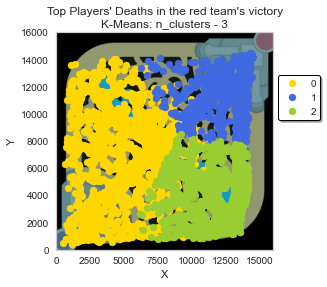

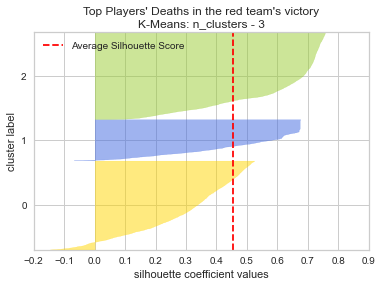

Silhouette score: 0.4531853252225594
0    2960
2    2872
1    1366
Name: cluster, dtype: int64

Inertia: 6759.1337759663265

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5902.863514,6992.701689,0.105743
1,1,12811.335286,12326.410688,-0.579795
2,2,11610.862813,3445.483635,-0.903900


In [175]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "royalblue", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [176]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2482.329045,2871.415122,0.656543
1,1,1727.621043,1900.875038,0.623363
2,2,1606.458097,1692.202597,0.318573


In [177]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,12357.0,548.0,14041.0,453.0,1,-1
1,1,14424.0,6241.0,14509.0,6795.0,1,-1
2,2,14132.0,6166.0,8487.0,812.0,1,-1


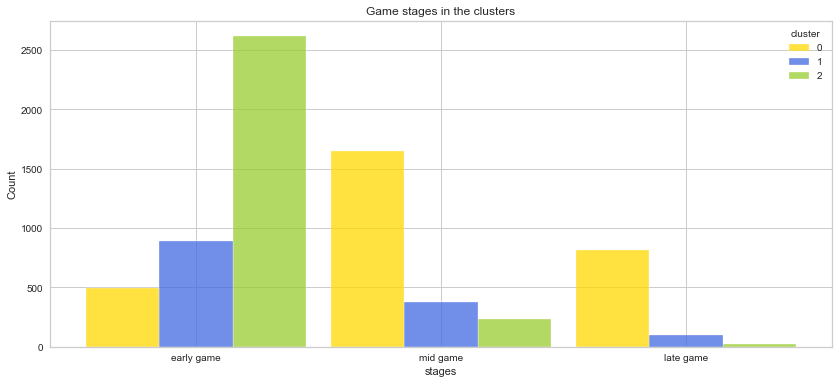

In [178]:
stagesPerClusterV2(redSideVictory_df, colors)

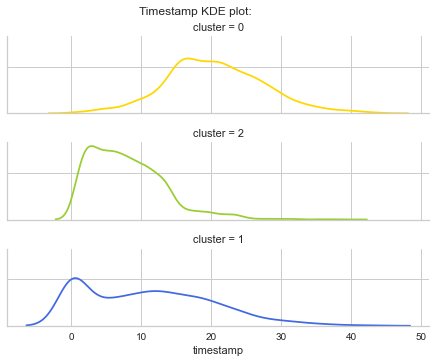

In [179]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 4

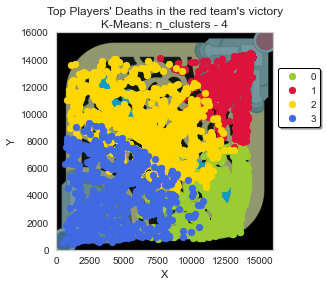

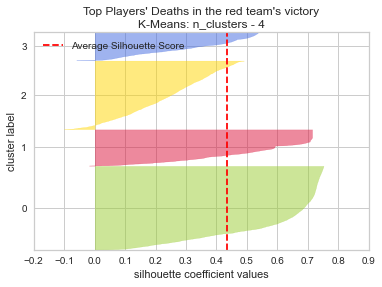

Silhouette score: 0.43562020995832573
0    2788
2    2284
1    1206
3     920
Name: cluster, dtype: int64

Inertia: 5344.440540837581

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,11708.412841,3368.880201,-0.905667
1,1,13211.134328,12598.703151,-0.629353
2,2,6916.404553,8456.543783,-0.119527
3,3,4289.572826,3837.481522,0.523913


In [180]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "crimson", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [181]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1533.740948,1623.400094,0.317015
1,1,1327.207937,1773.016092,0.593861
2,2,2277.070737,1955.810029,0.641654
3,3,2295.837173,2116.510712,0.512320


In [182]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14132.0,6166.0,8148.0,812.0,1,-1
1,1,14424.0,7638.0,14509.0,7591.0,1,-1
2,2,13069.0,810.0,14041.0,3694.0,1,-1
3,3,10801.0,548.0,9341.0,453.0,1,-1


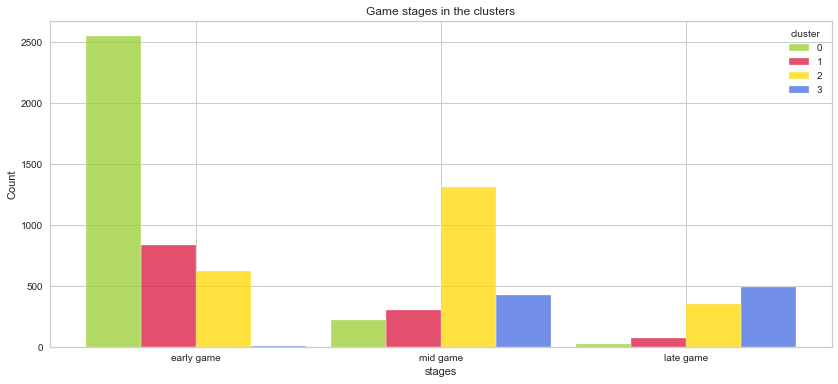

In [183]:
stagesPerClusterV2(redSideVictory_df, colors)

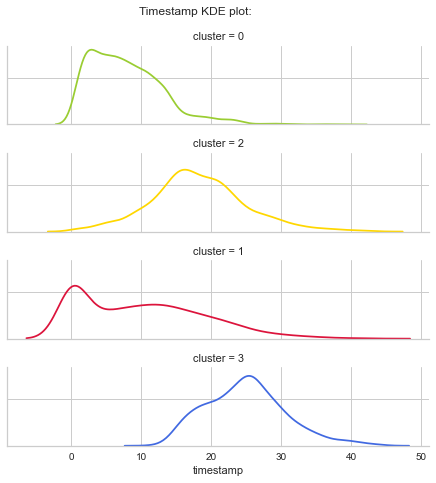

In [184]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [185]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Ashe,37
Annie,27
Rakan,25
Lux,23
Nautilus,18
Karma,16
Rell,14
Pyke,11
Renata,10
Heimerdinger,10


Deaths with each champion:

In [186]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Ashe            948
Annie           728
Rakan           671
Lux             607
Nautilus        493
Karma           439
Rell            381
Pyke            306
Heimerdinger    282
Renata          270
Caitlyn         196
Alistar         174
Kalista         162
Twitch          162
Amumu           156
Lulu            137
Thresh          120
Soraka          117
Maokai          116
Braum           109
Jhin             94
Varus            94
Zilean           80
Senna            64
Nami             58
Leona            57
Sett             53
Janna            32
Pantheon         30
Bard             26
Jax              19
Elise            17
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [187]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 32 champions when they won on the red side

Cluster 0 - died with 32 champions:
 ['Alistar' 'Amumu' 'Annie' 'Ashe' 'Bard' 'Braum' 'Caitlyn' 'Elise'
 'Heimerdinger' 'Janna' 'Jax' 'Jhin' 'Kalista' 'Karma' 'Leona' 'Lulu'
 'Lux' 'Maokai' 'Nami' 'Nautilus' 'Pantheon' 'Pyke' 'Rakan' 'Rell'
 'Renata' 'Senna' 'Sett' 'Soraka' 'Thresh' 'Twitch' 'Varus' 'Zilean']
Ashe            373
Annie           291
Rakan           269
Lux             242
Nautilus        195
Karma           168
Rell            147
Heimerdinger    119
Renata          115
Pyke            103
Caitlyn          71
Alistar          67
Kalista          65
Lulu             60
Amumu            56
Soraka           50
Thresh           50
Braum            44
Jhin             42
Twitch           39
Maokai           38
Varus            27
Nami             25
Leona            24
Zilean           23
Senna            19
Sett             17
Janna            14
Elise            10
Jax               9
Bard             

---
### Clustering Red Team Defeat

In [188]:
redSideDefeat_df = supp_deaths_df[(supp_deaths_df["team"] == "Red") & (supp_deaths_df["victory"] == False)]
redSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
28624,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,0.000000,14404.0,14201.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28625,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,1.000450,13283.0,3955.0,1.0,0.0,...,0.0,10.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28627,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,2.000817,12877.0,2053.0,1.0,1.0,...,0.0,10.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28628,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,3.000933,12884.0,2094.0,2.0,3.0,...,0.0,10.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28630,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,4.001050,12928.0,2807.0,3.0,5.0,...,0.0,10.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283525,KR_6375985152,Red,anonymous 125,kr,Kalista,19.005517,14037.0,13822.0,7.0,19.0,...,578.0,496.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283526,KR_6375985152,Red,anonymous 125,kr,Kalista,20.005650,5894.0,11266.0,8.0,20.0,...,578.0,496.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283528,KR_6375985152,Red,anonymous 125,kr,Kalista,21.006150,12860.0,12191.0,8.0,21.0,...,578.0,496.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283530,KR_6375985152,Red,anonymous 125,kr,Kalista,22.006333,12266.0,3266.0,8.0,23.0,...,746.0,548.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY


In [189]:
profiling_df = supp_deaths_df[(supp_deaths_df["team"] == "Red") & (supp_deaths_df["victory"] == False)].copy()

In [190]:
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_supp_deaths_df.shape[0]) * 100
winRateRedSide

42.84579958710497

In [191]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 109 lost 14 matches on the red side
anonymous 109 has an average of 27.571428571428573 deaths per game when losing on the red side

anonymous 110 lost 6 matches on the red side
anonymous 110 has an average of 28.333333333333332 deaths per game when losing on the red side

anonymous 111 lost 22 matches on the red side
anonymous 111 has an average of 27.681818181818183 deaths per game when losing on the red side

anonymous 112 lost 22 matches on the red side
anonymous 112 has an average of 26.09090909090909 deaths per game when losing on the red side

anonymous 113 lost 13 matches on the red side
anonymous 113 has an average of 29.923076923076923 deaths per game when losing on the red side

anonymous 115 lost 1 matches on the red side
anonymous 115 has an average of 29.0 deaths per game when losing on the red side

anonymous 116 lost 13 matches on the red side
anonymous 116 has an average of 26.923076923076923 deaths per game when losing on the red side

anonymous 117 lost 7 ma

In [192]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 198 matches in which the jungler died at least once
19 players died a total of 5396 times on the red side
Defeat games on red side contains an average of 27.252525252525253 deaths per game


In [193]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

,coordinate_x,coordinate_y,timestamp
28624,14404.0,14201.0,0.000000
28625,13283.0,3955.0,1.000450
28627,12877.0,2053.0,2.000817
28628,12884.0,2094.0,3.000933
28630,12928.0,2807.0,4.001050
...,...,...,...
283525,14037.0,13822.0,19.005517
283526,5894.0,11266.0,20.005650
283528,12860.0,12191.0,21.006150
283530,12266.0,3266.0,22.006333


Time discretization

In [194]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].apply(float)
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [195]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [196]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [197]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [198]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
28624,1.298837,1.654619,-1
28625,0.914737,-0.903056,-1
28627,0.775625,-1.377846,-1
28628,0.778023,-1.367612,-1
28630,0.793099,-1.189628,-1
...,...,...,...
283525,1.173088,1.560010,0
283526,-1.617036,0.921964,0
283528,0.769800,1.152869,0
283530,0.566271,-1.075049,0


In [199]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3703992013129161
Silhouette score for k=3: 0.4529299203698252
Silhouette score for k=4: 0.4258738245204902
Silhouette score for k=5: 0.3982868952921254
Silhouette score for k=6: 0.40179727154337
Silhouette score for k=7: 0.40950944599317585
Silhouette score for k=8: 0.4102173346427845
Silhouette score for k=9: 0.36318064729776756
Silhouette score for k=10: 0.3716800751388331
Silhouette score for k=11: 0.37531886984916685
Silhouette score for k=12: 0.3729216899985855
Silhouette score for k=13: 0.37852715790132657
Silhouette score for k=14: 0.38717331328726645
Silhouette score for k=15: 0.3890509666804777
Silhouette score for k=16: 0.3918093738129703
Silhouette score for k=17: 0.3963251572704461
Silhouette score for k=18: 0.4041414882550799
Silhouette score for k=19: 0.3933580914589563
Silhouette score for k=20: 0.39208682823432656
Silhouette score for k=25: 0.40881302904690664


K-Means with k = 3

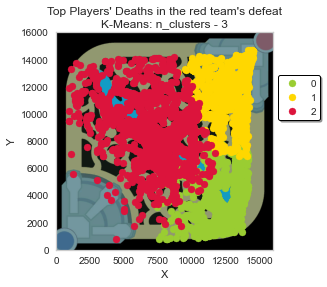

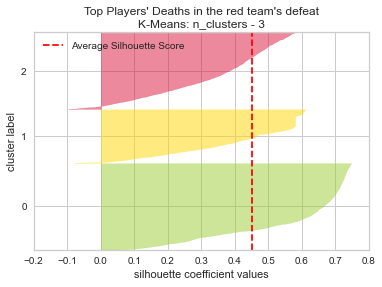

Silhouette score: 0.4529299203698252
0    2155
2    1903
1    1338
Name: cluster, dtype: int64

Inertia: 4891.4436713804735

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,11960.872390,3640.541531,-0.891415
1,1,13017.032138,12299.125561,-0.247384
2,2,7397.307409,8702.207567,-0.013663


In [200]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "crimson"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [201]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1395.661109,1789.718901,0.334131
1,1,1335.256976,1919.814409,0.766993
2,2,2056.997130,2189.453769,0.664245


In [202]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14122.0,7401.0,8765.0,772.0,1,-1
1,1,14536.0,9011.0,14719.0,6905.0,1,-1
2,2,11704.0,935.0,14157.0,795.0,1,-1


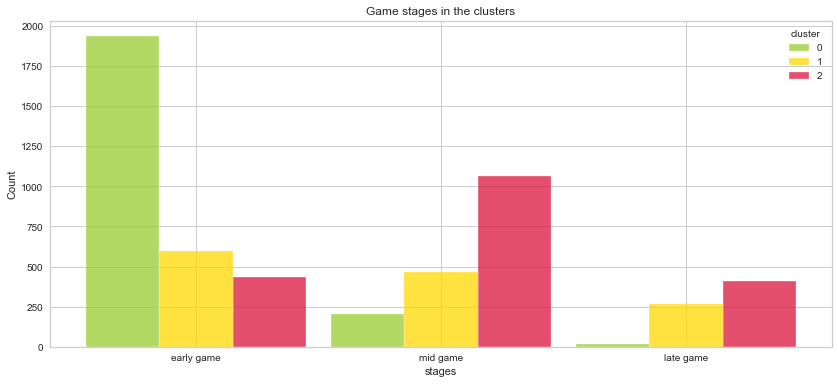

In [203]:
stagesPerClusterV2(redSideDefeat_df, colors)

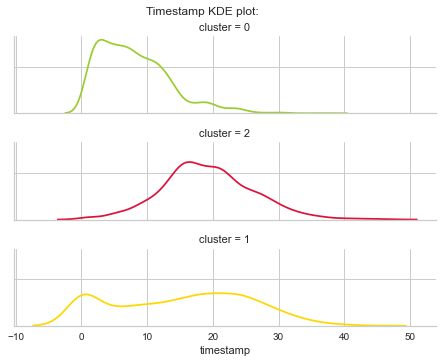

In [204]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [205]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Ashe,29
Rakan,20
Annie,18
Nautilus,12
Karma,11
Heimerdinger,9
Kalista,9
Thresh,9
Lux,9
Caitlyn,8


Deaths with each champion:

In [206]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Ashe            755
Rakan           536
Annie           479
Nautilus        329
Karma           315
Lux             286
Kalista         258
Heimerdinger    252
Thresh          249
Pyke            198
Caitlyn         195
Lulu            186
Twitch          163
Renata          161
Alistar         108
Maokai          105
Varus            97
Janna            96
Nami             91
Rell             80
Jhin             75
Bard             72
Leona            54
Braum            51
TahmKench        34
Swain            29
Blitzcrank       29
MissFortune      28
Sett             25
Shen             22
Senna            20
Gragas           18
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [207]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 32 champions when they won on the red side

Cluster 0 - died with 32 champions:
 ['Alistar' 'Annie' 'Ashe' 'Bard' 'Blitzcrank' 'Braum' 'Caitlyn' 'Gragas'
 'Heimerdinger' 'Janna' 'Jhin' 'Kalista' 'Karma' 'Leona' 'Lulu' 'Lux'
 'Maokai' 'MissFortune' 'Nami' 'Nautilus' 'Pyke' 'Rakan' 'Rell' 'Renata'
 'Senna' 'Sett' 'Shen' 'Swain' 'TahmKench' 'Thresh' 'Twitch' 'Varus']
Ashe            314
Rakan           218
Annie           194
Nautilus        129
Karma           129
Heimerdinger    109
Thresh          103
Lux              99
Kalista          93
Caitlyn          79
Lulu             78
Pyke             75
Renata           56
Twitch           53
Janna            44
Alistar          42
Maokai           41
Varus            40
Rell             34
Nami             33
Jhin             28
Bard             27
Leona            24
Braum            23
MissFortune      16
TahmKench        14
Shen             12
Senna            11
Blitzcrank       11
Swain            10
Graga

---
### Clustering Blue Team Victory

In [208]:
blueSideVictory_df = supp_deaths_df[(supp_deaths_df["team"] == "Blue") & (supp_deaths_df["victory"] == True)]
blueSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
28815,EUW1_6271689872,Blue,anonymous 109,euw1,Ashe,0.000000,329.0,650.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28816,EUW1_6271689872,Blue,anonymous 109,euw1,Ashe,1.000333,12094.0,3086.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28818,EUW1_6271689872,Blue,anonymous 109,euw1,Ashe,2.000750,12207.0,1874.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28819,EUW1_6271689872,Blue,anonymous 109,euw1,Ashe,3.001200,11785.0,2091.0,2.0,0.0,...,10.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28821,EUW1_6271689872,Blue,anonymous 109,euw1,Ashe,4.001433,12734.0,2735.0,3.0,0.0,...,36.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283201,KR_6375966263,Blue,anonymous 123,kr,Karma,25.006600,10902.0,9109.0,12.0,26.0,...,791.0,727.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283204,KR_6375966263,Blue,anonymous 123,kr,Karma,26.006900,12868.0,10851.0,13.0,30.0,...,1039.0,952.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283210,KR_6375966263,Blue,anonymous 123,kr,Karma,27.007050,6031.0,6727.0,13.0,30.0,...,1039.0,952.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283211,KR_6375966263,Blue,anonymous 123,kr,Karma,28.007333,12532.0,11719.0,14.0,32.0,...,1039.0,952.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY


In [209]:
profiling_df = supp_deaths_df[(supp_deaths_df["team"] == "Blue") & (supp_deaths_df["victory"] == True)].copy()

In [210]:
winsBlueSide = len(np.unique(blueSideVictory_df["gameId"]))

In [211]:
winRateRedSide = (winsBlueSide / gamesBlueSide) * 100
winRateRedSide

53.431372549019606

In [212]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_supp_deaths_df.shape[0]) * 100
winRateBlueSide

52.24029810051805

In [213]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 109 won 11 matches on the blue side
anonymous 109 has an average of 26.454545454545453 deaths per game when winning on the blue side

anonymous 110 won 9 matches on the blue side
anonymous 110 has an average of 26.666666666666668 deaths per game when winning on the blue side

anonymous 111 won 33 matches on the blue side
anonymous 111 has an average of 26.0 deaths per game when winning on the blue side

anonymous 112 won 24 matches on the blue side
anonymous 112 has an average of 26.166666666666668 deaths per game when winning on the blue side

anonymous 113 won 17 matches on the blue side
anonymous 113 has an average of 27.941176470588236 deaths per game when winning on the blue side

anonymous 115 won 6 matches on the blue side
anonymous 115 has an average of 28.5 deaths per game when winning on the blue side

anonymous 116 won 6 matches on the blue side
anonymous 116 has an average of 28.333333333333332 deaths per game when winning on the blue side

anonymous 117 won 9 mat

In [214]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 218 matches in which the jungler died at least once
19 players died a total of 5748 times on the blue side
Victory games on blue side contains an average of 26.36697247706422 deaths per game


In [215]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

,coordinate_x,coordinate_y,timestamp
28815,329.0,650.0,0.000000
28816,12094.0,3086.0,1.000333
28818,12207.0,1874.0,2.000750
28819,11785.0,2091.0,3.001200
28821,12734.0,2735.0,4.001433
...,...,...,...
283201,10902.0,9109.0,25.006600
283204,12868.0,10851.0,26.006900
283210,6031.0,6727.0,27.007050
283211,12532.0,11719.0,28.007333


Time discretization

In [216]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].apply(float)
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [217]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [218]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [219]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [220]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
28815,-1.995746,-1.272366,-1
28816,0.965368,-0.605266,-1
28818,0.993809,-0.937173,-1
28819,0.887597,-0.877748,-1
28821,1.126449,-0.701388,-1
...,...,...,...
283201,0.665356,1.044135,1
283204,1.160175,1.521183,1
283210,-0.560619,0.391823,1
283211,1.075608,1.758885,1


In [221]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.35473826747225323
Silhouette score for k=3: 0.4699905537481747
Silhouette score for k=4: 0.4422533531202607
Silhouette score for k=5: 0.4210017689608895
Silhouette score for k=6: 0.4308616571424973
Silhouette score for k=7: 0.4337008707410724
Silhouette score for k=8: 0.37327966029899395
Silhouette score for k=9: 0.3686490071281529
Silhouette score for k=10: 0.3750000032948808
Silhouette score for k=11: 0.38485139357026926
Silhouette score for k=12: 0.38491871084090035
Silhouette score for k=13: 0.38999894488162784
Silhouette score for k=14: 0.3965307216690768
Silhouette score for k=15: 0.38937172964860295
Silhouette score for k=16: 0.4080973583802762
Silhouette score for k=17: 0.40233248145191336
Silhouette score for k=18: 0.40797266178325026
Silhouette score for k=19: 0.41215959581538014
Silhouette score for k=20: 0.4134669805774884
Silhouette score for k=25: 0.40328494767876005


K-Means with k = 3

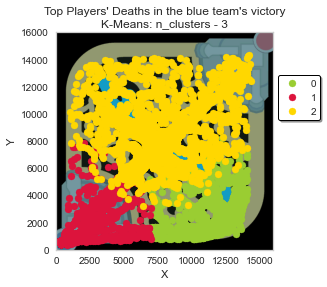

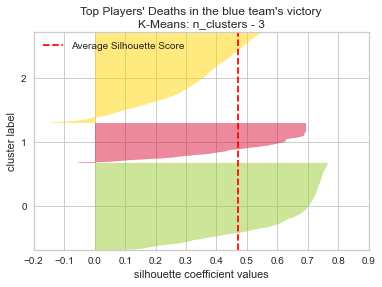

Silhouette score: 0.4699905537481747
2    2385
0    2312
1    1051
Name: cluster, dtype: int64

Inertia: 5121.081397038419

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,11433.044983,3137.672145,-0.918253
1,1,2333.441484,1804.783064,-0.590866
2,2,7791.955136,8927.242767,0.052411


In [222]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "crimson", "gold"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [223]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1718.196475,1533.362535,0.290827
1,1,1929.223599,1575.115905,0.623114
2,2,2843.611744,2385.638898,0.645724


In [224]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14093.0,6423.0,8210.0,769.0,1,-1
1,1,7009.0,286.0,7826.0,332.0,1,-1
2,2,14322.0,1066.0,14363.0,3235.0,1,-1


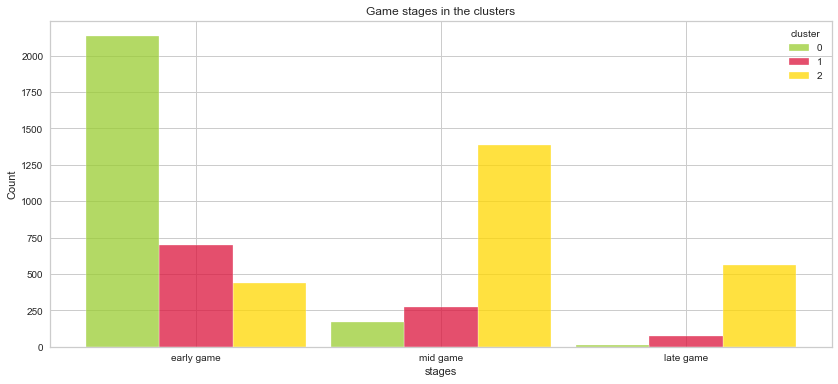

In [225]:
stagesPerClusterV2(blueSideVictory_df, colors)

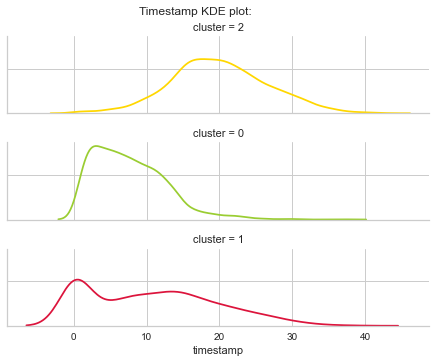

In [226]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 4

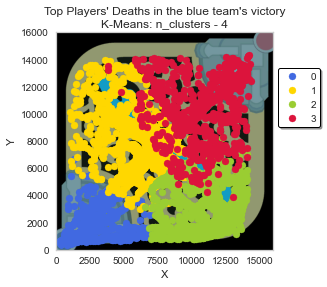

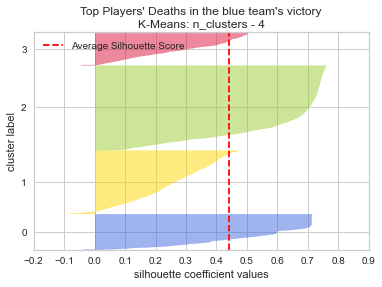

Silhouette score: 0.4422533531202607
2    2257
1    1687
0     952
3     852
Name: cluster, dtype: int64

Inertia: 4043.1943368929856

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2098.069328,1463.626050,-0.612395
1,1,6219.747481,7945.761114,-0.204505
2,2,11511.029685,3064.354453,-0.917590
3,3,10562.194836,10244.694836,0.446009


In [227]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [228]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1819.801108,1162.100942,0.616623
1,1,1870.592781,2169.257068,0.621892
2,2,1650.894294,1477.745843,0.290655
3,3,2164.476276,2313.646420,0.506433


In [229]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,6920.0,286.0,6696.0,332.0,1,-1
1,1,10256.0,1066.0,13953.0,3008.0,1,-1
2,2,14069.0,6543.0,8210.0,769.0,1,-1
3,3,14322.0,3848.0,14363.0,3861.0,1,-1


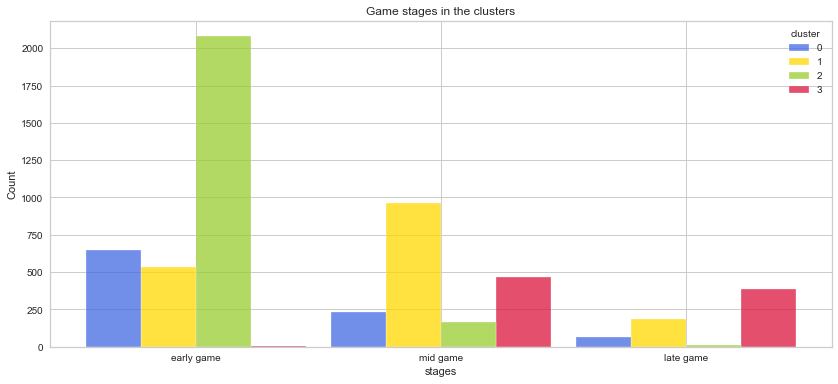

In [230]:
stagesPerClusterV2(blueSideVictory_df, colors)

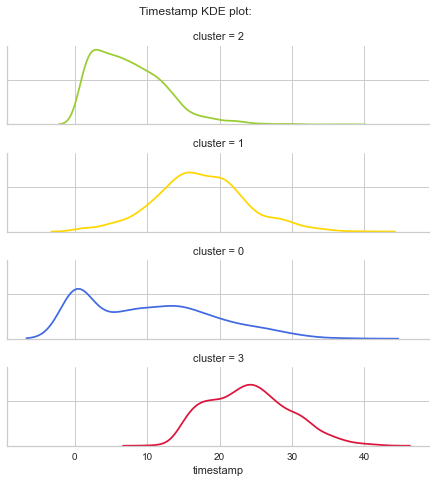

In [231]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [232]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Ashe,42
Annie,23
Karma,17
Rakan,17
Nautilus,13
Lulu,11
Lux,10
Heimerdinger,10
Rell,9
Pyke,8


Deaths with each champion:

In [233]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Ashe            1031
Annie            596
Rakan            486
Karma            444
Nautilus         374
Lulu             294
Heimerdinger     264
Lux              260
Rell             239
Pyke             197
Kalista          189
Renata           187
Senna            123
Caitlyn          122
Thresh           102
Varus            100
Alistar           97
Braum             73
Amumu             69
Twitch            65
Sona              55
Janna             51
Bard              41
Blitzcrank        36
Xerath            30
TahmKench         28
Soraka            26
Morgana           26
Neeko             23
Sett              23
Maokai            22
MissFortune       21
Nami              19
Jax               18
Shen              17
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [234]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 35 champions when they won on the red side

Cluster 0 - died with 35 champions:
 ['Alistar' 'Amumu' 'Annie' 'Ashe' 'Bard' 'Blitzcrank' 'Braum' 'Caitlyn'
 'Heimerdinger' 'Janna' 'Jax' 'Kalista' 'Karma' 'Lulu' 'Lux' 'Maokai'
 'MissFortune' 'Morgana' 'Nami' 'Nautilus' 'Neeko' 'Pyke' 'Rakan' 'Rell'
 'Renata' 'Senna' 'Sett' 'Shen' 'Sona' 'Soraka' 'TahmKench' 'Thresh'
 'Twitch' 'Varus' 'Xerath']
Ashe            176
Annie           113
Rakan            79
Karma            79
Nautilus         68
Lulu             50
Lux              42
Rell             41
Kalista          33
Pyke             32
Heimerdinger     31
Renata           26
Caitlyn          18
Varus            18
Alistar          17
Senna            17
Amumu            13
Thresh           10
Sona              9
Braum             9
Janna             8
Bard              8
Twitch            7
Blitzcrank        7
MissFortune       6
Xerath            5
Soraka            4
Morgana           4
Jax               4

---
### Clustering Blue Team Defeat

In [235]:
blueSideDefeat_df = supp_deaths_df[(supp_deaths_df["team"] == "Blue") & (supp_deaths_df["victory"] == False)]
blueSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
28573,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,0.000000,329.0,650.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28574,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,1.000417,11472.0,6090.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28576,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,2.000717,11248.0,926.0,1.0,1.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28577,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,3.000917,7331.0,1287.0,1.0,1.0,...,70.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28579,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,4.000933,6115.0,1075.0,3.0,2.0,...,70.0,18.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283714,KR_6375965891,Blue,anonymous 126,kr,Karma,13.002833,13065.0,3696.0,7.0,7.0,...,410.0,248.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283717,KR_6375965891,Blue,anonymous 126,kr,Karma,14.002867,11123.0,995.0,7.0,7.0,...,410.0,248.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283718,KR_6375965891,Blue,anonymous 126,kr,Karma,15.003117,1948.0,1131.0,8.0,7.0,...,410.0,573.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283722,KR_6375965891,Blue,anonymous 126,kr,Karma,16.003533,2483.0,4680.0,8.0,7.0,...,410.0,593.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY


In [236]:
profiling_df = supp_deaths_df[(supp_deaths_df["team"] == "Blue") & (supp_deaths_df["victory"] == False)].copy()

In [237]:
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_supp_deaths_df.shape[0]) * 100
winRateBlueSide

47.75970189948196

In [238]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 109 lost 7 matches on the blue side
anonymous 109 has an average of 24.142857142857142 deaths per game when losing on the blue side

anonymous 110 lost 5 matches on the blue side
anonymous 110 has an average of 31.6 deaths per game when losing on the blue side

anonymous 111 lost 14 matches on the blue side
anonymous 111 has an average of 29.214285714285715 deaths per game when losing on the blue side

anonymous 112 lost 21 matches on the blue side
anonymous 112 has an average of 29.61904761904762 deaths per game when losing on the blue side

anonymous 113 lost 13 matches on the blue side
anonymous 113 has an average of 30.384615384615383 deaths per game when losing on the blue side

anonymous 115 lost 7 matches on the blue side
anonymous 115 has an average of 31.285714285714285 deaths per game when losing on the blue side

anonymous 116 lost 11 matches on the blue side
anonymous 116 has an average of 26.454545454545453 deaths per game when losing on the blue side

anonymous 

In [239]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 190 matches in which the jungler died at least once
19 players died a total of 5255 times on the blue side
Defeat games on blue side contains an average of 27.657894736842106 deaths per game


In [240]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

,coordinate_x,coordinate_y,timestamp
28573,329.0,650.0,0.000000
28574,11472.0,6090.0,1.000417
28576,11248.0,926.0,2.000717
28577,7331.0,1287.0,3.000917
28579,6115.0,1075.0,4.000933
...,...,...,...
283714,13065.0,3696.0,13.002833
283717,11123.0,995.0,14.002867
283718,1948.0,1131.0,15.003117
283722,2483.0,4680.0,16.003533


Time discretization

In [241]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].apply(float)
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [242]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [243]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [244]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [245]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
28573,-1.651679,-1.190429,-1
28574,1.061401,0.590938,-1
28576,1.006862,-1.100050,-1
28577,0.053157,-0.981838,-1
28579,-0.242913,-1.051259,-1
...,...,...,...
283714,1.449262,-0.192994,-1
283717,0.976427,-1.077456,-1
283718,-1.257487,-1.032922,0
283722,-1.127226,0.129224,0


In [246]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.370019052834554
Silhouette score for k=3: 0.45251487163306964
Silhouette score for k=4: 0.4148392034852022
Silhouette score for k=5: 0.40135219252670634
Silhouette score for k=6: 0.41115765414072125
Silhouette score for k=7: 0.4116259960240584
Silhouette score for k=8: 0.4216669509906161
Silhouette score for k=9: 0.3469488299359625
Silhouette score for k=10: 0.36486469405489547
Silhouette score for k=11: 0.36252798243009554
Silhouette score for k=12: 0.3729423414373267
Silhouette score for k=13: 0.3803031170641211
Silhouette score for k=14: 0.3941542181010579
Silhouette score for k=15: 0.39584529473443664
Silhouette score for k=16: 0.3996964686482182
Silhouette score for k=17: 0.40714934873625297
Silhouette score for k=18: 0.4018789243152133
Silhouette score for k=19: 0.40791086323541453
Silhouette score for k=20: 0.4106034658296478
Silhouette score for k=25: 0.39789938712072676


K-Means with k = 3

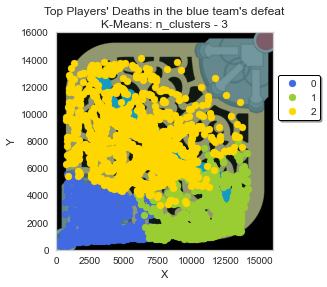

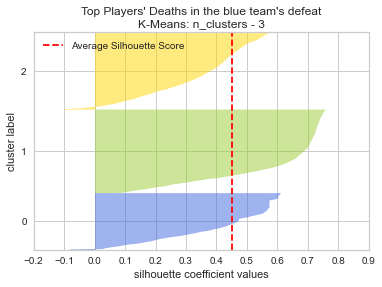

Silhouette score: 0.45251487163306964
1    2022
2    1854
0    1379
Name: cluster, dtype: int64

Inertia: 4862.255748546581

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2569.913706,1790.138506,-0.216824
1,1,11280.731454,2854.982690,-0.887735
2,2,5945.828479,7701.324164,0.012945


In [247]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "yellowgreen", "gold"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [248]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2010.246377,1316.198751,0.778691
1,1,1809.521843,1406.265281,0.351284
2,2,2361.736277,2111.155726,0.684900


In [249]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,8280.0,101.0,5548.0,278.0,1,-1
1,1,14119.0,5997.0,7859.0,741.0,1,-1
2,2,13709.0,744.0,14106.0,3309.0,1,-1


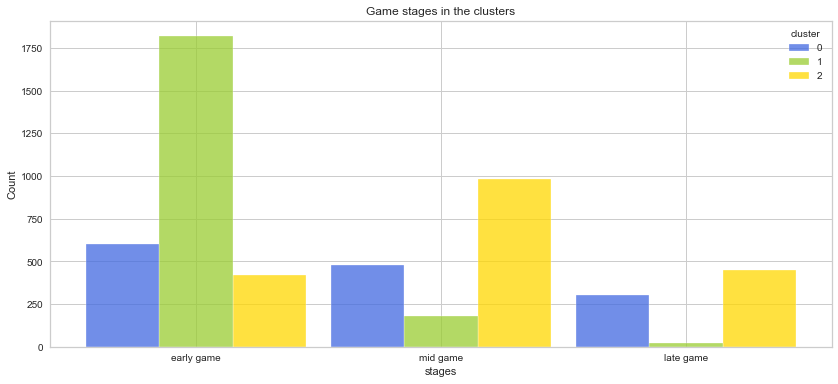

In [250]:
stagesPerClusterV2(blueSideDefeat_df, colors)

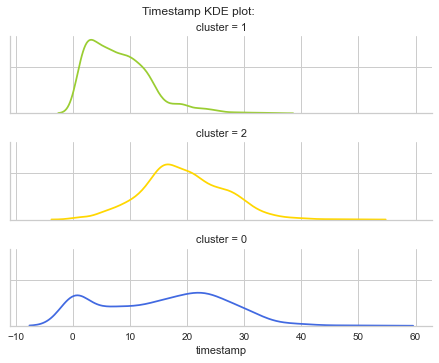

In [251]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [252]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Ashe,26
Annie,23
Nautilus,18
Lux,16
Karma,12
Rakan,11
Heimerdinger,8
Pyke,8
Caitlyn,7
Renata,7


Deaths with each champion:

In [253]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Ashe            744
Annie           601
Nautilus        514
Lux             430
Karma           340
Rakan           310
Renata          235
Pyke            232
Heimerdinger    216
Caitlyn         209
Twitch          151
Lulu            149
Nami            118
Thresh          117
Rell            110
Leona            94
Braum            75
Kalista          65
Alistar          46
Jhin             45
Gragas           40
Morgana          34
Bard             34
Seraphine        33
MissFortune      31
Zac              30
Vi               29
Janna            28
Soraka           26
Teemo            25
Senna            24
Blitzcrank       23
Yuumi            22
Sett             21
Varus            19
Sion             18
Xayah            17
Name: champion, dtype: int64

In [254]:
championsDeaths = profiling_df["champion"].value_counts().index.tolist()
test3 = []
index = 0
aux = 10
for ex in profiling_df["champion"].value_counts():
    #print(ex)
    testrow= {}
    testrow["champion"] = championsDeaths[index]
    testrow["deaths"] = ex
    testrow["x"] = aux
    testrow["y"] = 10
    test3.append(testrow)
    #print(championsDeaths[index])
    index += 1
    aux += 10
test3 = pd.DataFrame(test3)

fig = px.scatter(test3, x="x", y="y",
	         size="deaths", color="champion",
                 hover_name="champion", log_x=True, size_max=60)
fig.show()

In [255]:
""" test = pd.DataFrame()
test[["champion","coordinate_x", "coordinate_y"]] = profiling_df[["champion", "coordinate_x", "coordinate_y"]].copy()

index = 0
test2 = []
for row in test.iterrows():
    #print(row[1][0])
    champion = row[1][0]
    index = 0
    for ex in profiling_df["champion"].value_counts():
        #print(ex)
        if(championsDeaths[index] == champion):

            #print(championsDeaths[index] + "=" + champion)
            #print(ex)
            test2.append(ex)
        #print(championsDeaths[index])
        index += 1

test["deaths"] = test2
test

fig = px.scatter(test, x="coordinate_x", y="coordinate_y",
	         size="deaths", color="champion",
                 hover_name="champion", log_x=True, size_max=60)
fig.show() """

' test = pd.DataFrame()\ntest[["champion","coordinate_x", "coordinate_y"]] = profiling_df[["champion", "coordinate_x", "coordinate_y"]].copy()\n\nindex = 0\ntest2 = []\nfor row in test.iterrows():\n    #print(row[1][0])\n    champion = row[1][0]\n    index = 0\n    for ex in profiling_df["champion"].value_counts():\n        #print(ex)\n        if(championsDeaths[index] == champion):\n\n            #print(championsDeaths[index] + "=" + champion)\n            #print(ex)\n            test2.append(ex)\n        #print(championsDeaths[index])\n        index += 1\n\ntest["deaths"] = test2\ntest\n\nfig = px.scatter(test, x="coordinate_x", y="coordinate_y",\n\t         size="deaths", color="champion",\n                 hover_name="champion", log_x=True, size_max=60)\nfig.show() '

Number of deaths per champions in each cluster:

In [256]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 37 champions when they won on the red side

Cluster 0 - died with 37 champions:
 ['Alistar' 'Annie' 'Ashe' 'Bard' 'Blitzcrank' 'Braum' 'Caitlyn' 'Gragas'
 'Heimerdinger' 'Janna' 'Jhin' 'Kalista' 'Karma' 'Leona' 'Lulu' 'Lux'
 'MissFortune' 'Morgana' 'Nami' 'Nautilus' 'Pyke' 'Rakan' 'Rell' 'Renata'
 'Senna' 'Seraphine' 'Sett' 'Sion' 'Soraka' 'Teemo' 'Thresh' 'Twitch'
 'Varus' 'Vi' 'Xayah' 'Yuumi' 'Zac']
Ashe            184
Annie           176
Nautilus        124
Lux             122
Karma            86
Rakan            80
Renata           74
Pyke             57
Heimerdinger     53
Caitlyn          49
Lulu             42
Twitch           40
Rell             30
Thresh           29
Nami             29
Leona            18
Kalista          17
Braum            15
MissFortune      13
Gragas           11
Alistar          11
Zac              11
Janna            10
Seraphine         9
Soraka            9
Varus             9
Morgana           9
Bard              8
Vi     

---

### Blue Win Rate vs Red Win Rate

In [257]:
wins_df = supp_deaths_df[supp_deaths_df["victory"] == True]
wins_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
28681,EUW1_6273884721,Red,anonymous 109,euw1,Nami,0.000000,14404.0,14201.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28682,EUW1_6273884721,Red,anonymous 109,euw1,Nami,1.000517,9716.0,6368.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28683,EUW1_6273884721,Red,anonymous 109,euw1,Nami,2.000967,12429.0,1623.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28685,EUW1_6273884721,Red,anonymous 109,euw1,Nami,3.001317,11627.0,1547.0,2.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
28687,EUW1_6273884721,Red,anonymous 109,euw1,Nami,4.001483,11222.0,9742.0,3.0,0.0,...,0.0,88.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283755,KR_6375939420,Red,anonymous 126,kr,Annie,15.004967,7055.0,6283.0,8.0,5.0,...,56.0,214.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283758,KR_6375939420,Red,anonymous 126,kr,Annie,16.005283,10074.0,6771.0,8.0,6.0,...,56.0,214.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283763,KR_6375939420,Red,anonymous 126,kr,Annie,17.005467,5904.0,5224.0,8.0,6.0,...,56.0,214.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY
283765,KR_6375939420,Red,anonymous 126,kr,Annie,18.005850,6273.0,9101.0,9.0,6.0,...,140.0,214.0,True,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY


In [258]:
wins = len(np.unique(wins_df["gameId"]))
wins

485

In [259]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 55.05154639175258 vs Blue: 44.948453608247426


In [260]:
b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 55.60018538544724 vs Blue: 44.39981461455276
